In [1]:
#Importing important modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print('Done importing')

Done importing


In [2]:
#Importing datasets
sns.set(rc={'figure.figsize':(13,10)})
feat_train=pd.read_csv('C:\\Users\\mnmureithi\\Desktop\\New folder\\dengue_features_train.csv')
feat_test=pd.read_csv('C:\\Users\\mnmureithi\\Desktop\\New folder\\dengue_features_test.csv')
lab_train=pd.read_csv('C:\\Users\\mnmureithi\\Desktop\\New folder\\dengue_labels_train.csv')

## Descriptive stats

In [3]:
feat_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
feat_test.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [5]:
lab_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [6]:
feat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [7]:
lab_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [8]:
feat_train.drop(['city','year','weekofyear'],axis=1,inplace=True)#Because we will be appending them

In [9]:
frames=[feat_train,lab_train]#you can use merge or just add a column to the data
df=pd.concat(frames,axis=1)
#df=feat_train.merge(lab_train,how='right')

In [10]:
df.head()#5rows 25 columns

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city,year,weekofyear,total_cases
0,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,sj,1990,18,4
1,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,sj,1990,19,5
2,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,sj,1990,20,4
3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,sj,1990,21,3
4,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,sj,1990,22,6


In [11]:
df.isna().sum()

week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
city                                       0
year      

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip_amt_kg_per_m2          1446 non-null float64
reanalysis_relative_humidity_percent     1446 non-null float64
reanalysis_sat_precip_amt_mm             1443 non-null float64
reanalysis_s

In [13]:
#City distribution
df['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

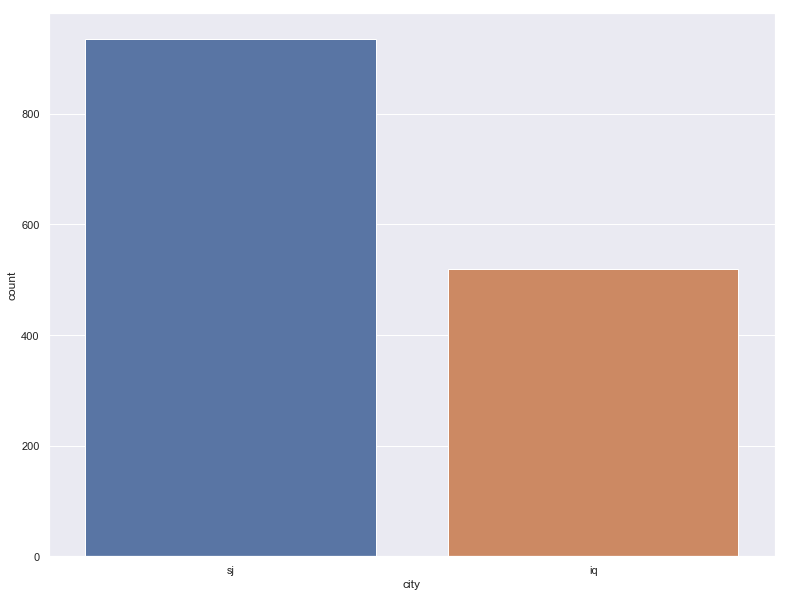

In [14]:
sns.countplot(df['city'])

In [15]:
#convert date format
df['week_start_date']=pd.to_datetime(df['week_start_date'])
feat_test['week_start_date']=pd.to_datetime(feat_test['week_start_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip_amt_kg_per_m2          1446 non-null float64
reanalysis_relative_humidity_percent     1446 non-null float64
reanalysis_sat_precip_amt_mm             1443 non-null float64
rean

In [16]:
#Extracting dates and months
def extract_date(df,column):
    df[column+"_day"]=df[column].apply(lambda x:x.day)
    df[column+"_month"]=df[column].apply(lambda x:x.month)

In [17]:
extract_date(df,'week_start_date')
extract_date(feat_test,'week_start_date')

In [18]:
df.head()

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city,year,weekofyear,total_cases,week_start_date_day,week_start_date_month
0,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,6.900000,29.4,20.0,16.0,sj,1990,18,4,30,4
1,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,6.371429,31.7,22.2,8.6,sj,1990,19,5,7,5
2,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,6.485714,32.2,22.8,41.4,sj,1990,20,4,14,5
3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,6.771429,33.3,23.3,4.0,sj,1990,21,3,21,5
4,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,9.371429,35.0,23.9,5.8,sj,1990,22,6,28,5


In [19]:
feat_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_day,week_start_date_month
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,29,4
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,6,5
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,13,5
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,20,5
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,27,5


In [20]:
#Null Values replace with median, mean in categorical replace with the most occuring.
df.replace(np.nan,df.median(axis=0),inplace=True)
feat_test.replace(np.nan,feat_test.median(axis=0),inplace=True)

In [21]:
df=pd.get_dummies(df,columns=['city'])
feat_test=pd.get_dummies(feat_test,columns=['city'])


In [22]:
df.columns

Index(['week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'year', 'weekofyear',
       'total_cases', 'week_start_date_day', 'week_start_date_month',
       'city_iq', 'city_sj'],
      dtype='object')

In [23]:
#x=df.drop[['week_start_date','total_case']]
x=df[[ 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'year', 'weekofyear',
        'week_start_date_day', 'week_start_date_month',
       'city_iq', 'city_sj']]
y=df['total_cases']

In [24]:
df.head()

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,station_max_temp_c,station_min_temp_c,station_precip_mm,year,weekofyear,total_cases,week_start_date_day,week_start_date_month,city_iq,city_sj
0,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,29.4,20.0,16.0,1990,18,4,30,4,0,1
1,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,31.7,22.2,8.6,1990,19,5,7,5,0,1
2,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,32.2,22.8,41.4,1990,20,4,14,5,0,1
3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,33.3,23.3,4.0,1990,21,3,21,5,0,1
4,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,35.0,23.9,5.8,1990,22,6,28,5,0,1


In [25]:
feat_test.columns

Index(['year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'week_start_date_day',
       'week_start_date_month', 'city_iq', 'city_sj'],
      dtype='object')

In [26]:
feat_test.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_day,week_start_date_month,city_iq,city_sj
0,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,...,3.128571,26.528571,7.057143,33.3,21.7,75.2,29,4,0,1
1,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,...,2.571429,26.071429,5.557143,30.0,22.2,34.3,6,5,0,1
2,2008,20,2008-05-13,-0.0015,0.088700,0.151083,0.091529,3.66,299.455714,299.357143,...,4.428571,27.928571,7.785714,32.8,22.8,3.0,13,5,0,1
3,2008,21,2008-05-20,0.1101,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,...,4.342857,28.057143,6.271429,33.3,24.4,0.3,20,5,0,1
4,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,...,3.542857,27.614286,7.085714,33.3,23.3,84.1,27,5,0,1


In [27]:
#x_test=feat_test.drop['week_start_date']
x_test=feat_test[['year', 'weekofyear','ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'week_start_date_day',
       'week_start_date_month', 'city_iq', 'city_sj']]
#df.column.to_list()

In [28]:
x.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,year,weekofyear,week_start_date_day,week_start_date_month,city_iq,city_sj
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,...,6.900000,29.4,20.0,16.0,1990,18,30,4,0,1
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,...,6.371429,31.7,22.2,8.6,1990,19,7,5,0,1
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,...,6.485714,32.2,22.8,41.4,1990,20,14,5,0,1
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,...,6.771429,33.3,23.3,4.0,1990,21,21,5,0,1
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,...,9.371429,35.0,23.9,5.8,1990,22,28,5,0,1


In [29]:
feat_train.head()

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [30]:
x_test.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_day,week_start_date_month,city_iq,city_sj
0,2008,18,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,...,3.128571,26.528571,7.057143,33.3,21.7,75.2,29,4,0,1
1,2008,19,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,...,2.571429,26.071429,5.557143,30.0,22.2,34.3,6,5,0,1
2,2008,20,-0.0015,0.088700,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,...,4.428571,27.928571,7.785714,32.8,22.8,3.0,13,5,0,1
3,2008,21,0.1101,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,...,4.342857,28.057143,6.271429,33.3,24.4,0.3,20,5,0,1
4,2008,22,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,...,3.542857,27.614286,7.085714,33.3,23.3,84.1,27,5,0,1


## Standardizing

In [31]:
#Standardizing
scaler=preprocessing.StandardScaler()
x=scaler.fit_transform(x)
x_test=scaler.fit_transform(x_test)

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_p

In [33]:
x[:1]

array([[-0.13676827, -0.22495891, -0.07072916, -0.29422129, -0.76473878,
        -0.83153225, -1.17996499, -1.86207552, -1.12302861,  0.06946155,
        -0.18628899, -1.23216561, -0.76473878, -1.78013171, -0.63926644,
        -1.37417104, -0.54135739, -1.57138045, -1.34299878, -0.49011164,
        -2.04044804, -0.56635649,  1.68022226, -0.70082156, -0.74535599,
         0.74535599]])

## Machine learning

In [34]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=12)

In [35]:
'''
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
#gboosting=GradientBoostingRegressor(n_estimators=60)
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
gboosting = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
gboosting.fit(x_train, y_train)
'''

'\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.model_selection import GridSearchCV\n#gboosting=GradientBoostingRegressor(n_estimators=60)\nparameters = {\n    "loss":["deviance"],\n    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],\n    "min_samples_split": np.linspace(0.1, 0.5, 12),\n    "min_samples_leaf": np.linspace(0.1, 0.5, 12),\n    "max_depth":[3,5,8],\n    "max_features":["log2","sqrt"],\n    "criterion": ["friedman_mse",  "mae"],\n    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],\n    "n_estimators":[10]\n    }\ngboosting = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)\ngboosting.fit(x_train, y_train)\n'

In [36]:
linear=LinearRegression()
randforest=RandomForestRegressor(n_estimators=200,n_jobs=-1)#100 trees
gboosting=GradientBoostingRegressor(n_estimators=60)#n_estimators=200,learning_rate=0.005

In [37]:
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
randforest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
gboosting.fit(x_train,y_train)#Has 100 trees by default

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=60, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
y_pred1=linear.predict(x_valid)
y_pred2=randforest.predict(x_valid)
y_pred3=gboosting.predict(x_valid)

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


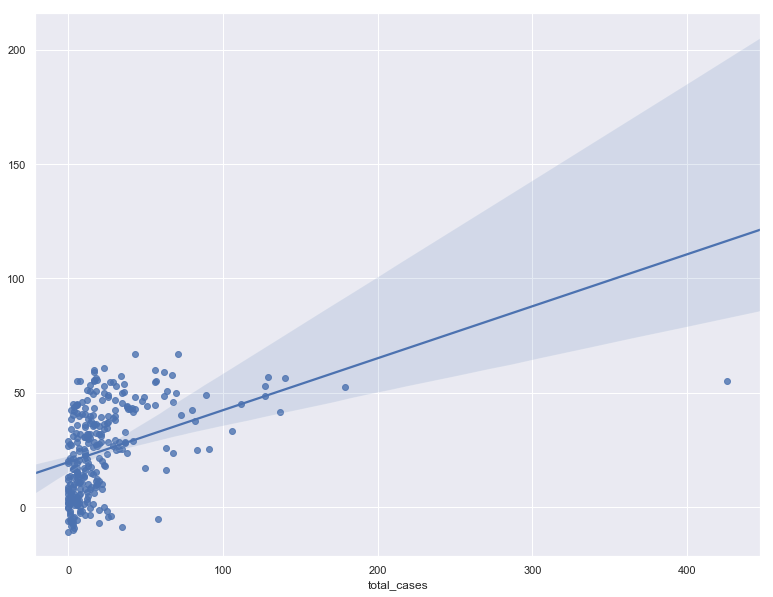

In [41]:
sns.regplot(y_valid,y_pred1)

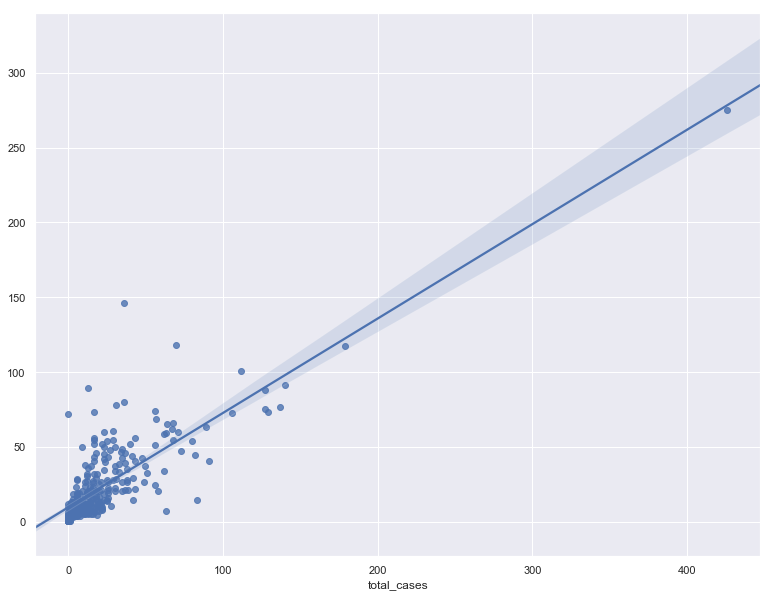

In [42]:
sns.regplot(y_valid,y_pred2)

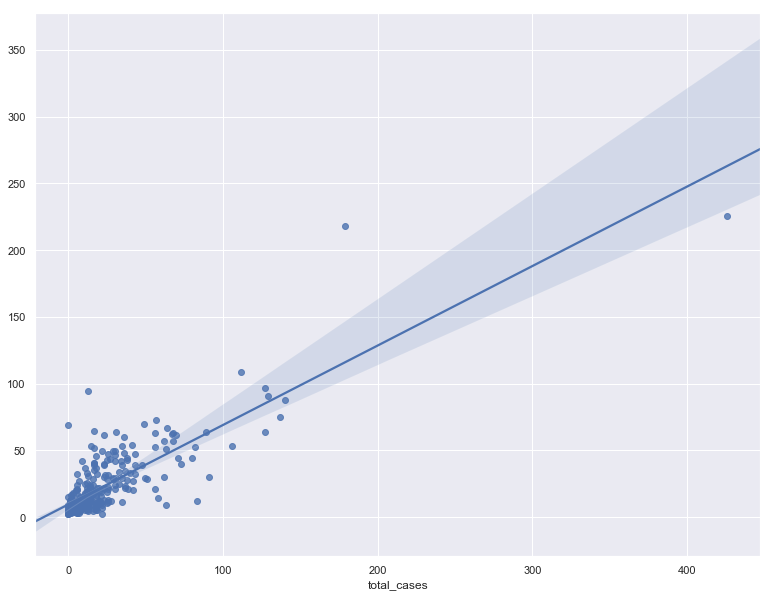

In [43]:
sns.regplot(y_valid,y_pred3)

In [44]:
mae1=metrics.mean_absolute_error(y_valid,y_pred1)
mae1

18.459267589227558

In [45]:
mae2=metrics.mean_absolute_error(y_valid,y_pred2)
mae2

11.686164383561644

In [46]:
mae3=metrics.mean_absolute_error(y_valid,y_pred3)
mae3

11.289450156925513

In [47]:
total_cases=gboosting.predict(x_test).astype(int)
total_cases


array([ 28,   8,   7,  16,  15,   8,  14,  17,  12,  14,   9,  11,  13,
        15,  34,  33,  26,  47,  47,  30,  30,  22,  14,  13,  19,  11,
        14,  16,  23,  15,  20,  33,  19,  33,  21,   9,  19,  11,  20,
        20,  21,  29,  21,  16,  19,  17,  10,   9,  11,  19,   6,   6,
         6,   7,   5,   7,  16,   9,  21,  16,  11,  11,  27,  18,  19,
        29,  26,  26,  36,  34,  45,  15,  36,  20,  53,  45,  49,  37,
        38,  19,  17,  18,  23,  21,  21,  20,  11,  16,  20,  37,  30,
        10,  25,  20,  29,   7,   6,  38,   7,   8,   8,   4,  10,   6,
         9,  12,  13,  29,  16,  33,  41,  27,  28,  25,  49,  39,  25,
        25,  42,  61,  47,  40,  65,  37,  61,  52,  26,  24,  39,  16,
        17,  15,  23,  12,  19,  23, 176,  10,  46,  18,  19,  17,  20,
        19,  13,  13,   8,  20,   9,   8,   8,  11,   7,  17,  20,   7,
         5,   5,   6,  14,  38,  14,  47,  24,  39,  32,  19,  20,  33,
        42,  30,  35,  37,  50,  39,  38,  43,  20,  35,  39,  2

In [50]:
final_manenoz=pd.read_csv('C:\\Users\\mnmureithi\\Desktop\\New folder\\dengue_features_test.csv')
final_manenoz.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [51]:
total_cases=pd.DataFrame(total_cases,columns=['total_cases'])

In [52]:
final_manenoz['total_cases']=total_cases
final_manenoz.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,28
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,8
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,7
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,16
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,15


In [53]:
my_submission=final_manenoz[['city','year','weekofyear','total_cases']]
my_submission.head()
my_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
city           416 non-null object
year           416 non-null int64
weekofyear     416 non-null int64
total_cases    416 non-null int32
dtypes: int32(1), int64(2), object(1)
memory usage: 11.5+ KB


In [54]:
my_submission.to_csv('DengAI_prediction2.csv',sep=',',index=False)